## Quick Start

Below is the un-cluttered tutorial code.

In [1]:
import mmic

In [2]:
disk = mmic.PPDisk(units='CGS')

# Simulation Box
disk.X = 25.*disk.AU.value
disk.Y = 25.*disk.AU.value
disk.Z = 25.*disk.AU.value

# Disk parameters
disk.rhoPower = -1.0                       # Radial density profile power
disk.tempPower = -0.5                      # Temperature profile power
disk.rout = 1.0*disk.AU.value              # Outer radius in AU
disk.rin = 0.3*disk.AU.value               # Inner radius of the disk in AU
disk.T0 = 150.                             # Central temperature
disk.sigma0 = (48000 * disk.sDens).value   # Central surface density
disk.Mstar = 1./3.*disk.Msol.value         # Mass of the star

# 'Atmosphere' parameters
disk.rhoAtm = (1e-26 * disk.vDens).value  # Volume Density
disk.tempAtm = 600                        # Temperature in Kelvin

In [3]:
disk.makeDisk()
disk.makeIC(filename='snapshot.std')

Generating initial mesh points...
Disk Created
Disk Mass: 0.02435132665566279 Msol
Disk Particles: 143058
Total Particles: 847647
Writing file...
Done.
Written to: snapshot.std


In [5]:
import yt

ds = yt.load('snapshot.std',n_ref=0)
s = yt.SlicePlot(ds,'z','density',width=(10,'AU'))

yt : [INFO     ] 2020-06-12 21:51:42,100 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-06-12 21:51:42,101 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-06-12 21:51:42,102 Parameters: domain_left_edge          = [-3.75e+14 -3.75e+14 -3.75e+14]
yt : [INFO     ] 2020-06-12 21:51:42,105 Parameters: domain_right_edge         = [3.75e+14 3.75e+14 3.75e+14]
yt : [INFO     ] 2020-06-12 21:51:42,106 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-06-12 21:51:42,118 Allocating for 8.476e+05 particles (index particle type 'all')
yt : [INFO     ] 2020-06-12 21:51:42,219 Adding 8.476e+05 particles
yt : [INFO     ] 2020-06-12 21:51:53,924 Identified 8.000e+07 octs
yt : [INFO     ] 2020-06-12 21:53:08,263 xlim = -5.000000 5.000000
yt : [INFO     ] 2020-06-12 21:53:08,266 ylim = -5.000000 5.000000
yt : [INFO     ] 2020-06-12 21:53:08,267 xlim = -5.000000 5.000000
yt : [INFO     ] 2020-06-12 21:53:08,268 ylim = -5.000000 5.000000
yt : [INFO 


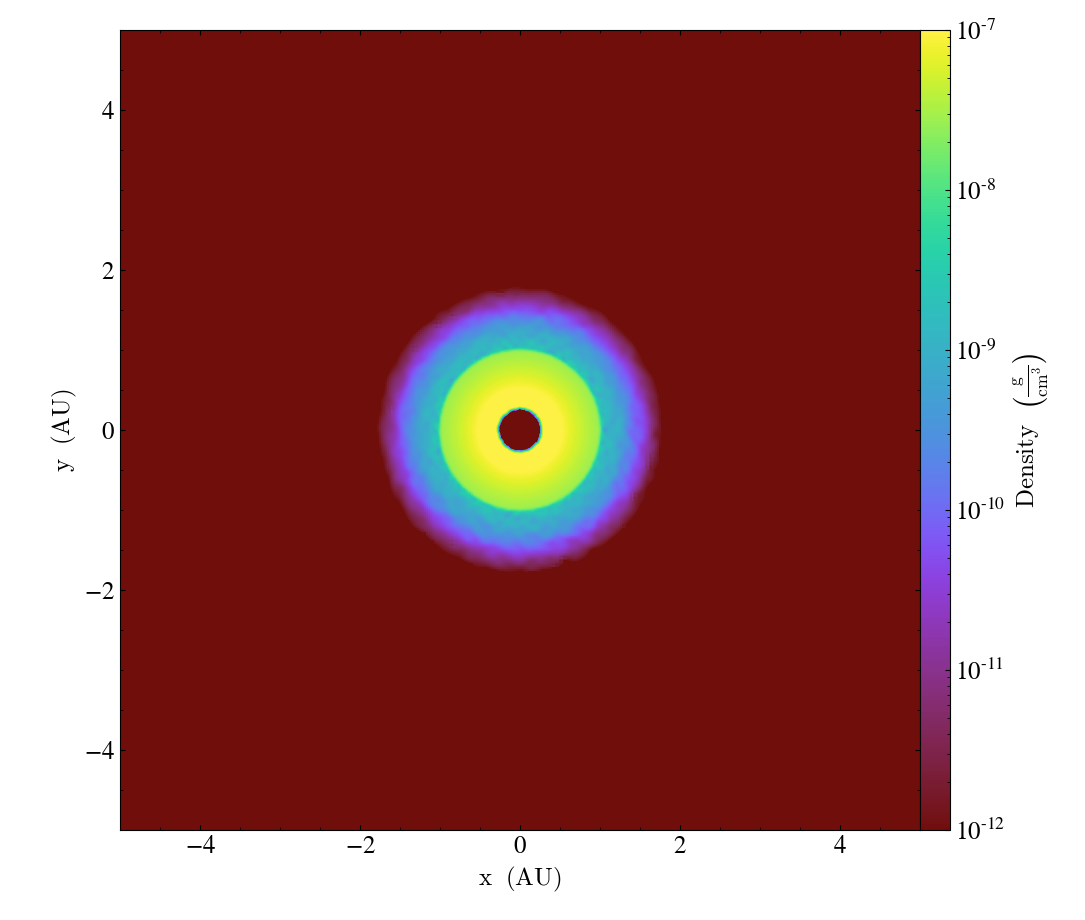

In [6]:
s.set_zlim('density',1e-12,1e-7)
s.show()